#### 1. Option on Stock

Consider a stock $S(t)$ for time $0 \leq t \leq T$. A call option with expiry $T$ and strike $K$ is the right to buy the stock at time $t=T$ at price $K$. The value of the option at time $t=T$ is $\operatorname{max}\left\lbrace S(T) - K, 0 \right\rbrace$. We want to calculate the value of the option at time $t=0$ using a model for the underlying stock. Break the interval $[0,T]$ into segments $[t_i, t_{i+1}]$. The relative change in the value of the stock between $t=t_i$ and $t =t_{i+1}$ is $\displaystyle \frac{S_{i+1} - S_i}{S_i}$. We guess that the relative change is equal to a prevailing compound interest rate $r$ plus/minus some random fluctuation with standard deviation $\sigma$. Under these assumptions, our model predicts that the value of $S(T)$ is randomly distributed as $$S(0) \cdot \displaystyle e^{\left(r - \frac{1}{2} \sigma^2 \right) T + \sigma \sqrt{T} \; N(0,1) } $$ where $N(0,1)$ is a normal random variable with mean 0 and standard deviation 1. Since we want to assign a value to the option at time $t=0$, we will take expected value. Recall that by the law of large numbers, we can repeatedly sample the value of the option at time $t=T$ to yield the expected value as an average. Therefore using $M$ samples $\left\lbrace N_j \right\rbrace_{j=1}^M$ from $N(0,1)$ we estimate the expected value as $$ \displaystyle \frac{1}{M} \displaystyle \sum_{j=1}^M \operatorname{max}\left\lbrace S(0) \cdot \displaystyle e^{\left(r - \frac{1}{2} \sigma^2 \right) T + \sigma \sqrt{T} \; N_j} - K, 0 \right\rbrace  \quad \quad \quad (\ast) $$ To obtain the expected value at $t=0$, we discount by $e^{-r \; T}$.

(a) Write a function ```callOption``` with inputs
 - ```K``` strike price
 - ```T``` expiry time 
 - ```S0``` value of $S(0)$
 - ```r``` compound interest rate $r$
 - ```sigma``` standard deviation $\sigma$
 - ```M``` number of samples
 
 The ouput should be 


 - expected value of the option, namely, $e^{-r \; T}$ times the expression $(\ast)$
 - the array of samples
 
 Note to generate $M$ samples use ```numpy.random.randn(M)``` .

(b) Evaluate ```callOption``` with 
 - ```K = 105```
 - ```T = 3``` expiry time 
 - ```S0 = 100``` value of $S(0)$
 - ```r = 0.05``` compound interest rate $r$
 - ```sigma = 0.2``` standard deviation $\sigma$
 - ```M = 10000``` number of samples

(c) Create a histogram showing the distribution of $$S(0) \cdot \displaystyle e^{\left(r - \frac{1}{2} \sigma^2 \right) T + \sigma \sqrt{T} \; N(0,1) } $$  from the sampes in (b).

In [1]:
import numpy as np

def callOption(K, T, S0, r, sigma, M):
    samples = np.random.randn(M)
    stock = S0 * np.exp((r- 0.5 * sigma**2)* T + np.sqrt(T) * sigma * samples)
    stock_value = np.where(stock > K, stock - K, 0)
    average = np.sum(stock_value)/M
    return np.exp(-r * T) * average, stock

In [2]:
K = 105
T = 3
r = 0.05
sigma = 0.2
S0 = 100
M = 10000

value, samples = callOption(K, T, S0, r, sigma, M)
print('Value of option is {0}'.format(value))

Value of option is 17.865937964829037


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

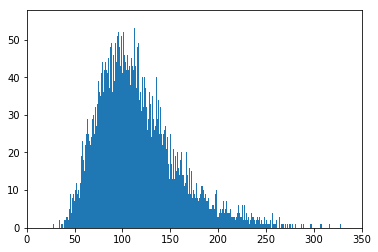

In [4]:
temp = pd.Series(samples)
temp_bin = pd.cut(temp, 1000)
temp_bin_value = temp_bin.value_counts()
temp_bin_value = temp_bin_value.sort_index()

x = [entry.left for entry in temp_bin_value.index]
y = temp_bin_value.values
plt.bar(x,y)
plt.xlim([0,350])
plt.show()

#### 2. Bond Prices

Consider a bond issued at time $t=0$ with maturity $t= T$. Let $P$ denote the principle of the bond, $c$ the coupon, $f$ the frequency of coupon payment, and $PV$ the price of the bond. Under continuously compounded interest rates, we can determine $y$ such that $$PV = e^{-y T} P + \sum_{j = 1}^{f T}\;  \frac{c}{f} \;  P \; e^{-y \; \frac{j}{f}} \ . $$ We call $y$ the bond yield. For example, with 

 - $P = 100$ dollars
 - $PV = 90$ dollars
 - $T = 1$ years 
 - $f = 4$ quarterly 
 - $c = 0.05$ coupon 
 
we would have $$90 = 100 e^{-y} + 0.05 \cdot 0.25 \cdot 100 e^{-0.25 y} + 0.05 \cdot 0.25 \cdot 100 e^{-0.5 y} + 0.05 \cdot 0.25 \cdot 100 e^{-0.75 y} + 0.05 \cdot 0.25 \cdot 100 e^{- y}  \ .$$  

(a) Write a function ```bondValue``` with inputs 
 
 - ```P``` principle
 - ```T``` time to maturity 
 - ```f``` frequency of coupon payment
 - ```c``` coupon
 - ```y``` bond yield 
 
 and output $$ e^{-y T} P + \sum_{j = 1}^{f T}\;  \frac{c}{f} \;  P \; e^{-y \; \frac{j}{f}} \ . $$

(b) Write a function ```bondDuration``` with input
 
 - ```P``` principle
 - ```T``` time to maturity 
 - ```f``` frequency of coupon payment
 - ```c``` coupon
 - ```y``` bond yield 
 
and output $$ \left( e^{-y T} P + \sum_{j = 1}^{f T}\;  \frac{c}{f} \;  P \; e^{-y \; \frac{j}{f}} \right)^{-1} \left( e^{-y T} T P + \sum_{j = 1}^{f T}\;  \frac{c}{f} \;  P \; \; \frac{j}{f} e^{-y \; \frac{j}{f}} \right)$$ namely the derivative of ```bondValue``` with respect to $y$ divided by minus ```bondValue```.

(c) Set 
 
 - $P = 100$ dollars
 - $PV = 90$ dollars
 - $T = 1$ years 
 - $f = 4$ quarterly 
 - $c = 0.05$ coupon 
 
Define a function ```bondYield``` with input ```y``` and output ```bondValue(P, T, f, c, y) - PV```. Use Newton's method to determine ```y```. Recall that with old guess $x_{\text{old}}$, Newton's method produces a new guess $x_{\text{new}}$ such that $$x_{\text{new}} = x_{\text{old}} + \displaystyle \frac{\text{bondValue(P, T, f, c, $x_{\text{old}}$) - PV}}{\text{bondValue(P, T, f, c, $x_{\text{old}}$)} \cdot \text{bondDuration(P, T, f, c, $x_{\text{old}}$)}} \ .$$

In [5]:
import numpy as np

def bondValue(P, T, f, c, y):
    annuity = np.arange(1, f * T + 1) / f
    coupons = (c * P / f ) * np.sum(np.exp(-y * annuity))
    return np.exp(-y * T) * P + coupons

In [6]:
def bondDuration(P, T, f, c, y):
    annuity = np.arange(1, f * T + 1) / f
    coupons = (c * P / f ) * np.sum(np.exp(-y * annuity) * annuity)
    numerator = np.exp(-y * T) * T * P + coupons
    denominator = bondValue(P, T, f, c, y)
    return numerator / denominator

In [7]:
P = 100
PV = 90
T = 1
f = 4
c = 0.05 

def bondYield(y):
    return bondValue(P, T, f, c, y) - PV

def NewtonStep(y):
    return (bondValue(P, T, f, c, y) - PV)/(bondValue(P, T, f, c, y) * bondDuration(P, T, f, c, y))

tolerance = 10**(-5)
maxiteration = 100
guess = 0.1
counter = 0

while (counter < maxiteration) & (bondYield(guess) > tolerance):
    guess = guess + NewtonStep(guess)
    counter += 1

print('Value of bond yield is {0}'.format(guess))

Value of bond yield is 0.15708441360185316


#### 3. Rank Correlation 

Suppose that we have two samples $\left\lbrace X_i \right\rbrace_{i=1}^n$ and $\left\lbrace Y_i \right\rbrace_{i=1}^n$. If values from  $\left\lbrace X_i \right\rbrace_{i=1}^n$ increase/descrease, do values from $\left\lbrace Y_i \right\rbrace_{i=1}^n$ increase/decrease? We want to understand the relationship using the Kendall statistic. Recall the definition of the sign function $$\operatorname{sign}(x) = \begin{cases} 1 & \text{ if } x > 0 \\ -1 & \text{ if } x < 0 \\ 0 & \text{ if } x = 0 \end{cases} \ .$$ Set 

 - $C$: number of pairs $i,j$ such that $\operatorname{sign}(X_i - X_j) \cdot \operatorname{sign}(Y_i - Y_j) > 0$
 - $D$: number of pairs $i,j$ such that $\operatorname{sign}(X_i - X_j) \cdot \operatorname{sign}(Y_i - Y_j) < 0$
 - $TX$: number of pairs $i,j$ such that $\operatorname{sign}(X_i - X_j) = 0$ and  $\operatorname{sign}(Y_i - Y_j) \not= 0$
 - $TY$: number of pairs $i,j$ such that $\operatorname{sign}(X_i - X_j) \not= 0$ and $\operatorname{sign}(Y_i - Y_j) = 0$ 

Here $1 \leq i \leq n$ and $1 \leq j \leq n$. Define the Kendall statistic $$\tau = \displaystyle \frac{C - D}{\sqrt{C + D + TX} \; \sqrt{C + D + TY}} \ . $$

(a) Write a function ```Kendall``` with inputs two samples of numbers and output the Kendall statistic. Use ```numpy.sign```

(b) Download AAPL.csv and MSFT.db. Using ```pandas```, import AAPL.csv. Using ```pandas``` and ```sqlite3``` import MSFT.db. You can use the query ```'SELECT * FROM MSFT'```

Compute the Kendall statistic of their ```Close``` columns. Note that the value is close to 1 indicating that the ranks of the closing prices are correlated.

In [8]:
def Kendall(xsample, ysample):
    if len(xsample) != len(ysample):
        raise Exception('Inputs must have same length')
    
    N = len(xsample)
    C = 0
    D = 0
    TX = 0
    TY = 0
    
    for j in range(N):
        for i in range(N):
            SX = np.sign(xsample[j] - xsample[i])
            SY = np.sign(ysample[j] - ysample[i])
            
            if SX == 0 and SY == 0:
                continue
            elif SX == 0 and SY != 0: 
                TX += 1
            elif SX != 0 and SY == 0: 
                TY += 1
            elif SX * SY > 0: 
                C += 1
            elif SX * SY < 0: 
                D += 1
    return (C - D)/(np.sqrt(C + D + TX) * np.sqrt(C + D + TY))

In [9]:
import pandas as pd
import sqlite3

In [10]:
aapl = pd.read_csv('./AAPL.csv')

In [11]:
connection = sqlite3.connect('./MSFT.db')

In [12]:
msft = pd.read_sql('SELECT CLOSE FROM MSFT', connection)

DatabaseError: Execution failed on sql 'SELECT CLOSE FROM MSFT': no such table: MSFT

In [ ]:
Kendall(aapl['Close'], msft['Close'])